In [1]:
import rawpy
import rawpy.enhance
import PIL
import os, glob
from matplotlib import pyplot as plt
import random

In [2]:
root_dir = "./raw_photos/"
os.chdir(root_dir)
photos_links = glob.glob("*.dng")
photos_links = list(map(lambda x : os.path.join(root_dir, x), photos_links))
os.chdir("..")

### Визуальный анализ исходников

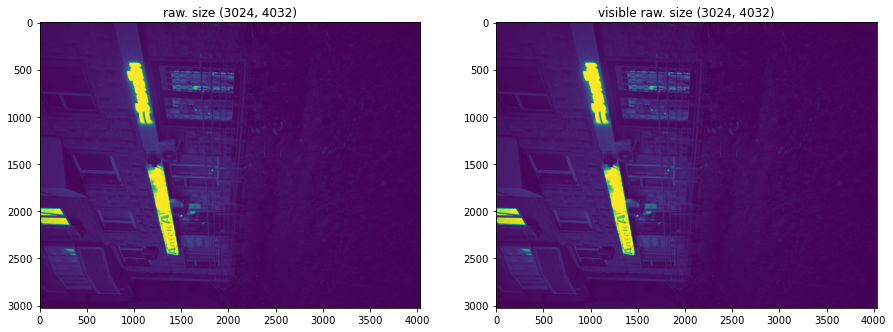

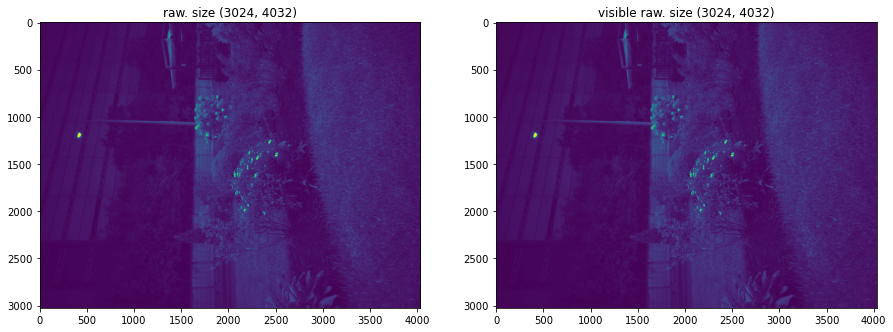

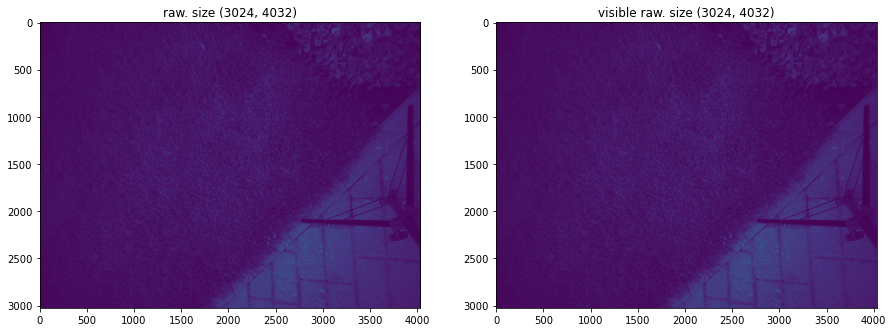

In [16]:
idxs = [random.randint(0, 49) for p in range(0, 3)]
for i in idxs:
    with rawpy.imread(photos_links[i]) as raw: 
        raw_0 = raw.raw_image
        raw_visible = raw.raw_image_visible
        plt.figure(figsize=(15, 15))
        plt.subplot(2, 2, 1)
        plt.title(f"raw. size {raw_0.shape}")
        plt.imshow(raw_0)
        plt.subplot(2, 2, 2)
        plt.title(f"visible raw. size {raw_visible.shape}")
        plt.imshow(raw_visible)

1. Они не ч/б, возможно это особенность фотокамеры.
2. Исходя из того что они визуально одинаковы и одинакового размера, делаю предположение, что камера перед записью raw файлов сама вычла уровни черного и нам этого делать не придется.

### Поиск битых пикселей

In [5]:
bad_pixels = rawpy.enhance.find_bad_pixels(photos_links)
print(bad_pixels)

[[2216  274]
 [2266 1660]
 [2450  471]
 [2655 3093]
 [2723 2793]]


### Обработка и сохранение в jpeg

In [6]:
from rawpy import DemosaicAlgorithm

In [7]:
for path in photos_links:
    with rawpy.imread(path) as raw:
        rawpy.enhance.repair_bad_pixels(raw, bad_pixels)        
        # Коррекцию виньетирования не освоила
        # Авто баланс белого use_auto_wb=True
        # Авто коррекция яркости no_auto_bright=False
        # Дебайеризация данных по умолчанию demosaic_algorithm default is AHD
        # Сглаживание шума median_filter_passes=1
        # Преобразование цветов по умолчанию output_color=ColorSpace.sRGB
        # Гамма по умолчанию gamma (power = 2.222,slope = 4.5)
        rgb = raw.postprocess(median_filter_passes=1, use_auto_wb=True)
        path = path.replace("./raw_photos/", "./processed_photos/").replace(".dng", ".jpeg")
        PIL.Image.fromarray(rgb).save(path)

repairing 5 bad pixels
repairing 5 bad pixels
repairing 5 bad pixels
repairing 5 bad pixels
repairing 5 bad pixels
repairing 5 bad pixels
repairing 5 bad pixels
repairing 5 bad pixels
repairing 5 bad pixels
repairing 5 bad pixels
repairing 5 bad pixels
repairing 5 bad pixels
repairing 5 bad pixels
repairing 5 bad pixels
repairing 5 bad pixels
repairing 5 bad pixels
repairing 5 bad pixels
repairing 5 bad pixels
repairing 5 bad pixels
repairing 5 bad pixels
repairing 5 bad pixels
repairing 5 bad pixels
repairing 5 bad pixels
repairing 5 bad pixels
repairing 5 bad pixels
repairing 5 bad pixels
repairing 5 bad pixels
repairing 5 bad pixels
repairing 5 bad pixels
repairing 5 bad pixels
repairing 5 bad pixels
repairing 5 bad pixels
repairing 5 bad pixels
repairing 5 bad pixels
repairing 5 bad pixels
repairing 5 bad pixels
repairing 5 bad pixels
repairing 5 bad pixels
repairing 5 bad pixels
repairing 5 bad pixels
repairing 5 bad pixels
repairing 5 bad pixels
repairing 5 bad pixels
repairing 5

### Визуальный анализ результатов

In [8]:
processed_dir = "./processed_photos/"
os.chdir(processed_dir)
processed_photos_links = glob.glob("*.jpeg")
processed_photos_links = list(map(lambda x : os.path.join(processed_dir, x), processed_photos_links))
os.chdir("..")

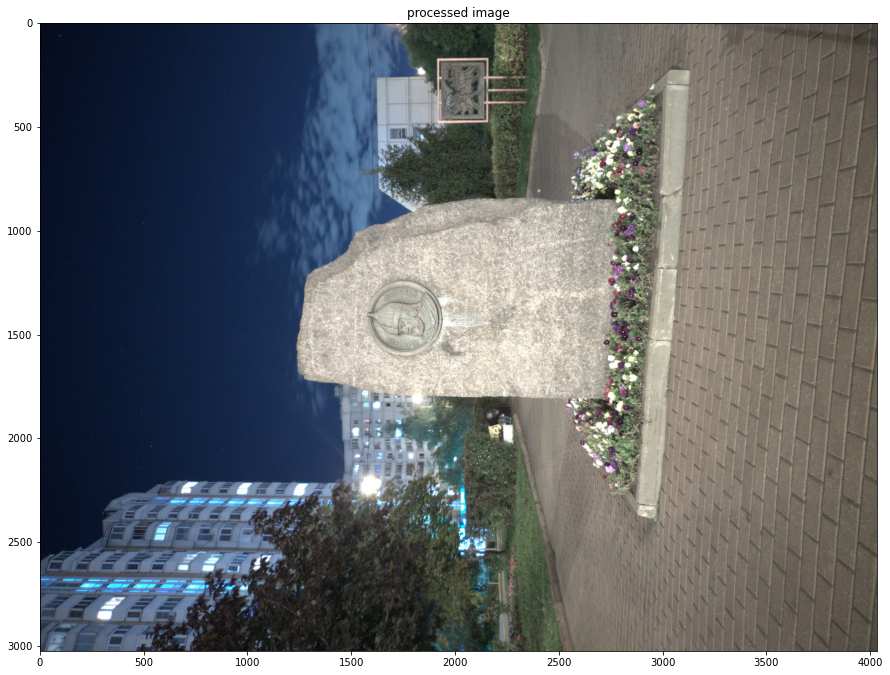

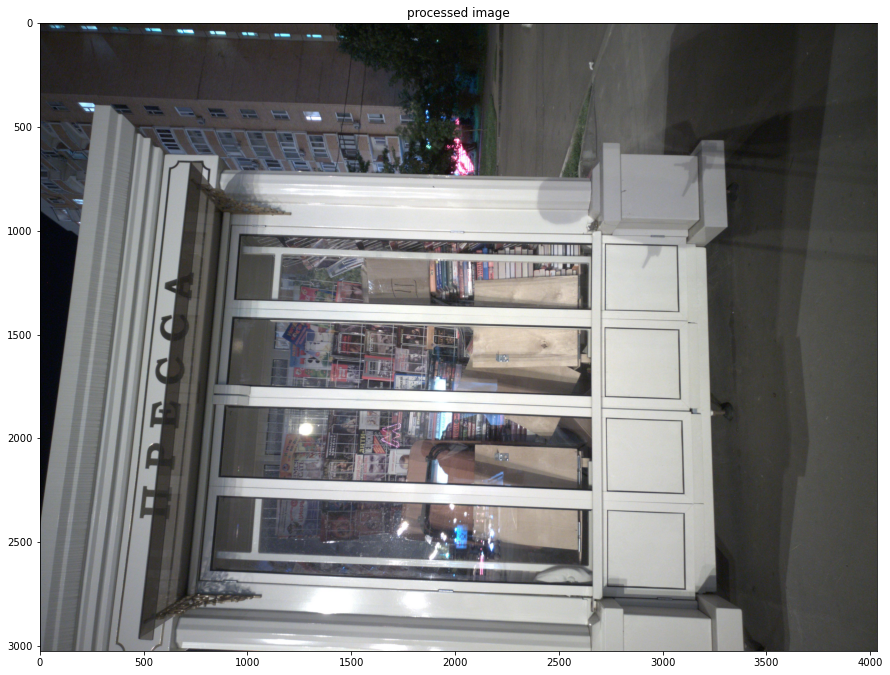

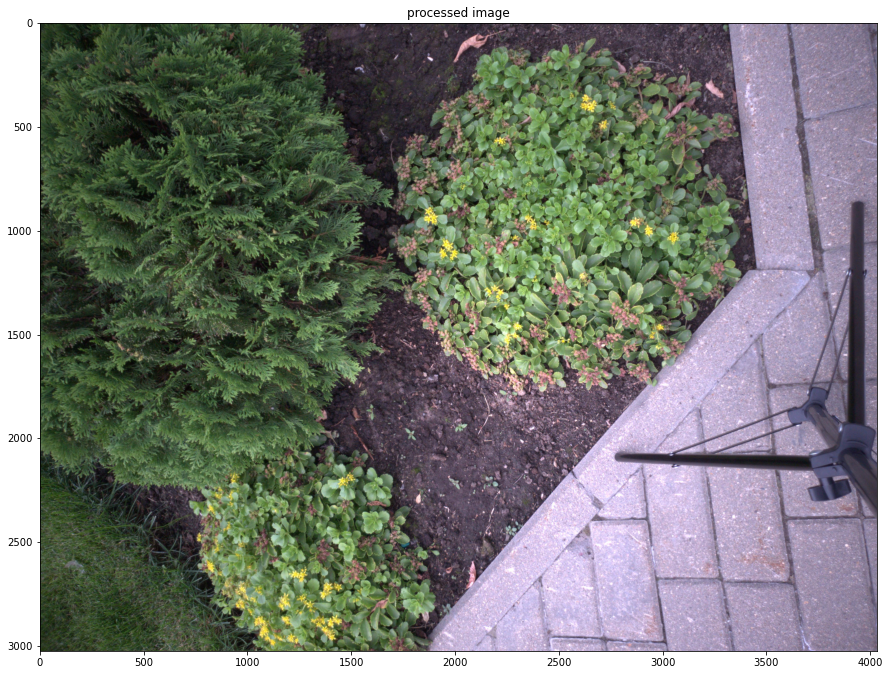

In [15]:
idxs = [random.randint(0, 49) for p in range(0, 3)]
for i in idxs:
    with PIL.Image.open(processed_photos_links[i]) as im:
        plt.figure(figsize=(15, 15))
        plt.title(f"processed image")
        plt.imshow(im)

Кажется это похоже на правду. 